# Machine Learning on PGA Tour - Classification

In this notebook I am going to combine all the stages of the machine learning problem to predict the PGA Tour results using two classification methods.

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
sns.set()

Read the data:

In [6]:
df = pd.read_csv("../data/pga_data.csv")
df.head(5)

,Name,Season,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Justin Thomas,2017,1,309.1,54.64,116.52,174.84,2320.1,1.0
1,Jordan Spieth,2017,2,294.6,58.67,112.66,168.55,2439.6,1.0
2,Xander Schauffele,2017,3,306.5,58.80,118.33,174.24,2518.8,1.0
3,Dustin Johnson,2017,4,314.8,54.02,121.45,180.66,2499.9,1.0
4,Jon Rahm,2017,5,305.3,58.27,116.42,174.53,2193.0,1.0


Function for data augmentation:

In [44]:
def augment_data(X, y):
    aug_X = []
    aug_y = []
    for i in range(X.shape[0]):
        if y[i] == 1:
            for _ in range(3):
                perturbations = np.random.standard_normal(5)
                aug_X.append(X[i] + perturbations)
                aug_y.append(1)
        else:
            aug_X.append(X[i])
            aug_y.append(y[i])
    return np.array(aug_X), np.array(aug_y)

Cross-validation:

In [56]:
X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

cv = KFold(n_splits=5, random_state=42, shuffle=True)

validation_errors = []
validation_accuracies = []
validation_f1s = []

training_errors = []
training_accuracies = []
training_f1s = []

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

for train_index, val_index in cv.split(y_rem):
    X_train, X_val = X_rem[train_index], X_rem[val_index]
    y_train, y_val = y_rem[train_index], y_rem[val_index]

    # AUGMENT THE TRAINING DATA
    X_train_aug, y_train_aug = augment_data(X_train, y_train)

    # STANDARDIZE
    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_aug)
    
    # MACHINE LEARNING MODEL
    lr = LogisticRegression()
    lr.fit(X_train_final, y_train_aug)

    # TRAINING ERROR
    y_pred_train = lr.predict(X_train_final)
    error_train = metrics.log_loss(y_train_aug, y_pred_train)
    accuracy_train = metrics.accuracy_score(y_train_aug, y_pred_train)
    f1_train = metrics.f1_score(y_train_aug, y_pred_train)
    
    training_errors.append(error_train)
    training_accuracies.append(accuracy_train)
    training_f1s.append(f1_train)

    # VALIDATION ERROR
    X_val_final = scaler.transform(X_val)
    y_pred_val = lr.predict(X_val_final)

    error = metrics.log_loss(y_val, y_pred_val)
    accuracy = metrics.accuracy_score(y_val, y_pred_val)
    f1 = metrics.f1_score(y_val, y_pred_val)

    validation_errors.append(error)
    validation_accuracies.append(accuracy)
    validation_f1s.append(f1)

    # CONFUSION MATRICES
    print(metrics.confusion_matrix(y_train_aug, y_pred_train))
    print(metrics.confusion_matrix(y_val, y_pred_val))

[[218 114]
 [108 225]]
[[67 20]
 [ 6 18]]
[[231 100]
 [ 94 242]]
[[54 34]
 [11 12]]
[[226 108]
 [126 201]]
[[57 28]
 [ 5 21]]
[[233 104]
 [101 217]]
[[58 24]
 [ 9 20]]
[[243  99]
 [100 206]]
[[49 28]
 [10 23]]


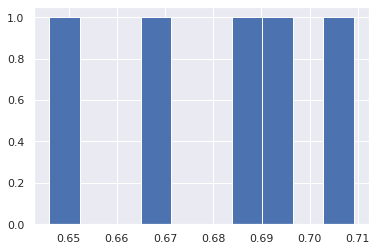

In [57]:
plt.hist(training_accuracies);

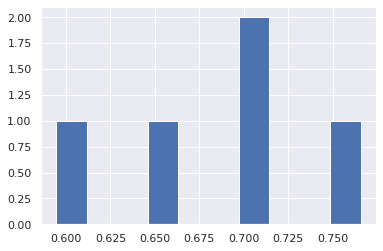

In [58]:
plt.hist(validation_accuracies);

In [63]:
np.mean(training_errors)

11.044067579810502

In [64]:
np.mean(validation_errors)

10.912296929727868

Final model performance:

In [52]:
# AUGMENT THE TRAINING DATA
X_train_aug, y_train_aug = augment_data(X_rem, y_rem)

# STANDARDIZE
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_aug)

# Machine learning model
lr = LogisticRegression()
lr.fit(X_train_final, y_train_aug)

X_test_final = scaler.transform(X_test)
y_pred = lr.predict(X_test_final)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
accuracy, f1

[[33 15]
 [ 3 11]]


(0.7096774193548387, 0.55)